In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:

filename = 'pge_electric_interval_data_2899025610_2022-02-25_to_2023-02-24.csv'

df = pd.read_csv(filename,header=4)

#//*** Cleanup COST Column
df["COST"] = df["COST"].str.replace("$","", regex=False)
df["COST"] = df["COST"].astype(float)
df["USAGE"] = df["USAGE"].astype(float)

#//*** Build Rate Column
df['RATE'] = df['COST'] / df['USAGE']

#//*** 
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.rename(columns= {"START TIME":"TIME"})


df['DAY'] = df['DATE'].dt.dayofweek

df['DAY_NAME'] = df['DATE'].dt.day_name()

df['TIME'] = df['TIME'].str.replace(":00","").astype(int) 

df = df[["DATE","DAY_NAME","DAY", "TIME","USAGE","RATE","COST"]]

df

,DATE,DAY_NAME,DAY,TIME,USAGE,RATE,COST
0,2022-02-25,Friday,4,0,0.44,0.318182,0.14
1,2022-02-25,Friday,4,1,0.76,0.315789,0.24
2,2022-02-25,Friday,4,2,1.24,0.314516,0.39
3,2022-02-25,Friday,4,3,0.66,0.303030,0.20
4,2022-02-25,Friday,4,4,0.57,0.315789,0.18
...,...,...,...,...,...,...,...
8731,2023-02-23,Thursday,3,19,0.55,0.418182,0.23
8732,2023-02-23,Thursday,3,20,0.59,0.423729,0.25
8733,2023-02-23,Thursday,3,21,0.61,0.409836,0.25
8734,2023-02-23,Thursday,3,22,0.55,0.400000,0.22


In [3]:
week_df = df [ df['DAY'] < 4]
week_df['DAY_NAME'].unique()

weekend_df = df [ df['DAY'] >= 4]
weekend_df['DAY_NAME'].unique()


array(['Friday', 'Saturday', 'Sunday'], dtype=object)

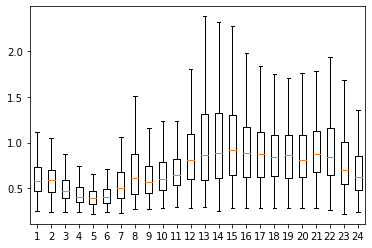

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.44,0.76,1.24,0.66,0.57,0.74,0.74,0.87,0.85,0.89,...,1.12,1.12,0.77,0.74,0.81,0.63,0.57,0.78,0.85,0.99
1,0.55,0.80,0.73,0.74,0.60,0.56,0.54,0.54,0.55,0.65,...,0.60,0.60,0.64,0.56,0.52,0.63,0.75,0.69,0.65,0.61
2,0.70,0.71,0.67,0.55,0.48,0.51,0.49,0.61,0.48,0.60,...,2.72,1.52,0.94,2.37,2.76,0.63,0.68,2.05,1.01,4.04
3,0.70,0.64,0.44,0.39,0.35,0.51,0.74,0.94,0.62,0.48,...,1.05,1.09,1.22,1.05,0.90,1.20,1.02,1.42,1.36,0.86
4,0.66,0.53,0.54,0.54,0.46,0.44,0.77,0.94,0.66,0.79,...,1.71,1.70,0.80,0.54,0.77,0.94,1.21,0.94,0.81,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.49,1.04,1.47,0.61,0.50,0.48,0.51,0.59,0.91,1.15,...,0.92,1.00,0.46,1.04,3.69,2.48,4.36,1.16,1.24,0.66
359,0.69,0.56,0.45,0.80,0.41,0.39,0.55,1.83,0.95,0.40,...,0.32,0.38,0.34,0.42,0.32,0.30,0.30,0.28,0.24,0.28
360,0.59,1.54,0.41,0.29,0.25,0.44,0.41,0.36,0.48,0.54,...,0.36,0.30,0.35,0.40,0.30,0.30,0.29,0.29,0.26,0.30
361,0.48,0.61,0.45,0.28,0.25,0.36,0.33,0.42,0.46,0.44,...,1.65,0.33,0.41,0.36,0.32,0.30,0.31,0.37,0.42,0.39


In [4]:
hour_df = pd.DataFrame() 
for x in df['TIME'].unique():
    hour_df[x] = df[df['TIME'] == x]['USAGE'].tolist()[:363]
fig, ax = plt.subplots()
ax.boxplot(hour_df, showfliers=False)
plt.show()
#hour_df.boxplot(showfliers=False)
hour_df

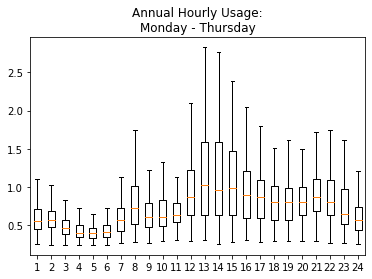

In [5]:
result_df = pd.DataFrame() 
tdf = week_df
for x in df['TIME'].unique():
    result_df[x] = tdf[tdf['TIME'] == x]['USAGE'].tolist()[:363]
    #fig, ax = plt.subplots()
    #ax.boxplot(tdf['USAGE'])
    #plt.show()
    
fig, ax = plt.subplots()
ax.boxplot(result_df, showfliers=False)
plt.title("Annual Hourly Usage:\nMonday - Thursday")
plt.show()    

#result_df.boxplot(showfliers=False)

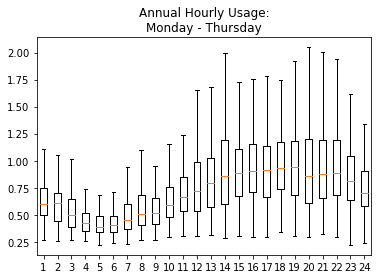

In [6]:
result_df = pd.DataFrame() 
tdf = weekend_df
min_value = -1
#//*** Get the minimum count of each day of the week, It won't quite align. Drop the newest values by default
for x in df['TIME'].unique():
    if min_value == -1:
        min_value = len(tdf[tdf['TIME'] == x]['USAGE'].tolist())
    elif len(tdf[tdf['TIME'] == x]['USAGE'].tolist()) < min_value:
        min_value = len(tdf[tdf['TIME'] == x]['USAGE'].tolist())

#//*** Build Resulting DF
for x in df['TIME'].unique():
    result_df[x] = tdf[tdf['TIME'] == x]['USAGE'].tolist()[:min_value]


fig, ax = plt.subplots()
ax.boxplot(result_df, showfliers=False)
plt.title("Annual Hourly Usage:\nMonday - Thursday")
plt.show()



In [36]:
def aggregate_by_hourly_usage(input_df):
    out_df = pd.DataFrame()
    
    min_value = -1
    #//*** Get the minimum count of each day of the week, It won't quite align. Drop the newest values by default
    for x in input_df['TIME'].unique():
        if min_value == -1:
            min_value = len(input_df[input_df['TIME'] == x]['USAGE'].tolist())
        elif len(input_df[input_df['TIME'] == x]['USAGE'].tolist()) < min_value:
            min_value = len(input_df[input_df['TIME'] == x]['USAGE'].tolist())
            
      #//*** Build Resulting DF
    for x in input_df['TIME'].unique():
        out_df[x] = input_df[input_df['TIME'] == x]['USAGE'].tolist()[:min_value]  
    
    return out_df


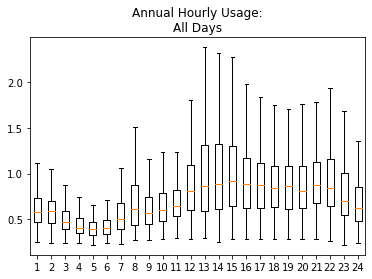

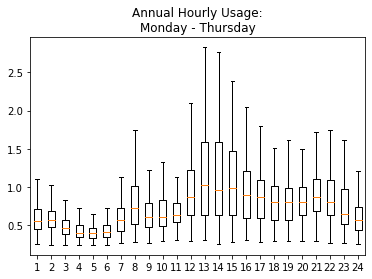

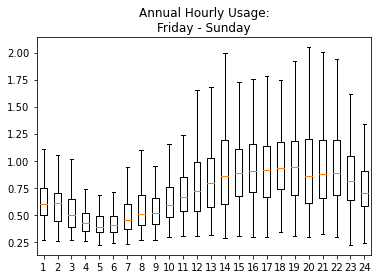

In [14]:
tdf = aggregate_by_hourly_usage(df)
fig, ax = plt.subplots()
ax.boxplot(tdf, showfliers=False)
plt.title("Annual Hourly Usage:\nAll Days")
plt.show()

tdf = aggregate_by_hourly_usage(week_df)
fig, ax = plt.subplots()
ax.boxplot(tdf, showfliers=False)
plt.title("Annual Hourly Usage:\nMonday - Thursday")
plt.show()

tdf = aggregate_by_hourly_usage(weekend_df)
fig, ax = plt.subplots()
ax.boxplot(tdf, showfliers=False)
plt.title("Annual Hourly Usage:\nFriday - Sunday")
plt.show()

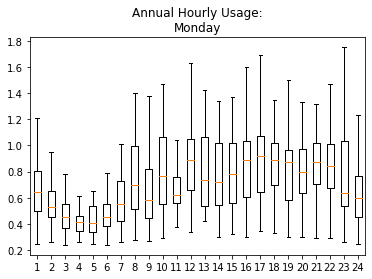

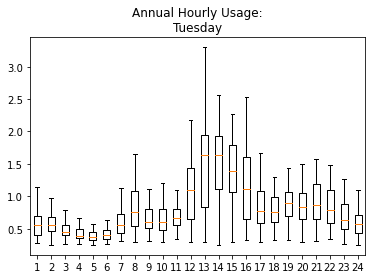

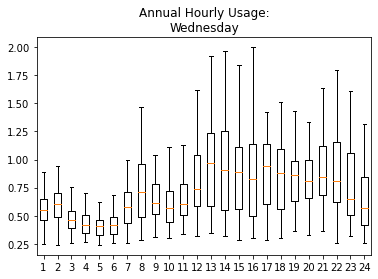

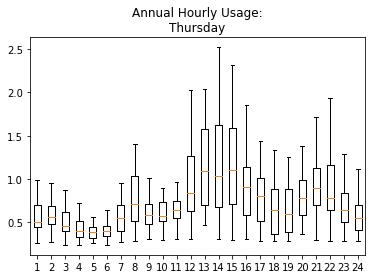

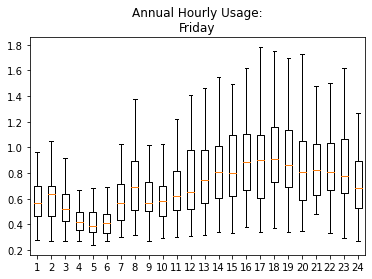

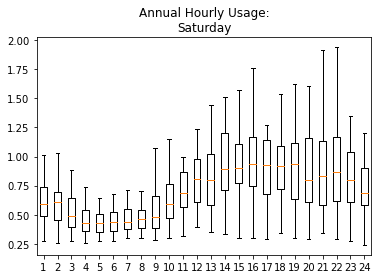

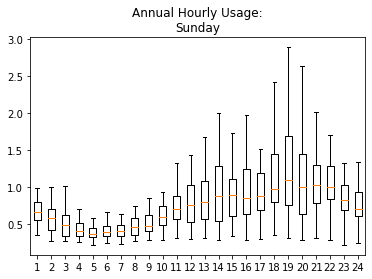

In [37]:
days = np.sort(df['DAY'].unique())

for day in days:
    day_df = df[df['DAY'] == day]
    day_name = day_df['DAY_NAME'].unique()[0]
    tdf = aggregate_by_hourly_usage(day_df)
    fig, ax = plt.subplots()
    ax.boxplot(tdf, showfliers=False)
    plt.title(f"Annual Hourly Usage:\n{day_name}")
    plt.show()
    

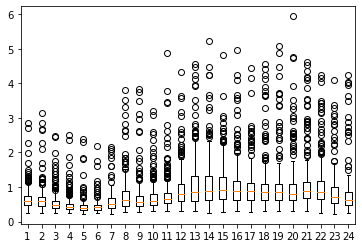

In [94]:
fig, ax = plt.subplots()
ax.boxplot(hour_df)
plt.show()

In [64]:
for col in ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]:
    print("========================")
    print(col)
    print(df[df["DAY"] == col].describe())
    print("TOTAL COST:",df[df["DAY"] == col]['COST'].sum())
    print("TOTAL KWH:",df[df["DAY"] == col]['USAGE'].sum())
    



Monday
             USAGE         RATE         COST
count  1248.000000  1248.000000  1248.000000
mean      0.758758     0.352602     0.268670
std       0.436607     0.028912     0.157191
min       0.240000     0.305263     0.080000
25%       0.470000     0.340000     0.170000
50%       0.670000     0.344828     0.230000
75%       0.940000     0.352113     0.340000
max       4.540000     0.482759     1.600000
TOTAL COST: 335.29999999999995
TOTAL KWH: 946.93
Tuesday
             USAGE         RATE         COST
count  1248.000000  1248.000000  1248.000000
mean      0.864006     0.353170     0.306330
std       0.597871     0.028481     0.215637
min       0.250000     0.321429     0.090000
25%       0.470000     0.340426     0.160000
50%       0.660000     0.344828     0.230000
75%       1.062500     0.351917     0.380000
max       5.210000     0.480000     1.990000
TOTAL COST: 382.29999999999995
TOTAL KWH: 1078.28
Wednesday
             USAGE         RATE         COST
count  1248.000000  1

In [45]:
df.describe()

,USAGE,RATE,COST
count,8736.000000,8736.000000,8736.000000
mean,0.800927,0.350066,0.281407
std,0.551455,0.025775,0.197112
min,0.220000,0.237288,0.080000
25%,0.470000,0.339623,0.160000
50%,0.650000,0.344262,0.230000
75%,0.950000,0.350877,0.340000
max,5.940000,0.487179,2.240000


In [43]:

df[df["USAGE"] > .95]

,DATE,TIME,USAGE,RATE,COST
2,2022-02-25,02:00,1.24,0.314516,0.39
10,2022-02-25,10:00,1.55,0.309677,0.48
11,2022-02-25,11:00,1.41,0.312057,0.44
12,2022-02-25,12:00,1.01,0.306931,0.31
13,2022-02-25,13:00,0.96,0.312500,0.30
...,...,...,...,...,...
8678,2023-02-21,14:00,1.65,0.351515,0.58
8710,2023-02-22,22:00,1.21,0.355372,0.43
8711,2023-02-22,23:00,1.23,0.357724,0.44
8712,2023-02-23,00:00,1.36,0.242647,0.33


In [46]:
8736 *.281

2454.8160000000003